# CG Assignment 2 Report

*Matriculation Numbers: 1750655*  
*Fullname: Jiajie Li*  
*Email: JJ@Hgeek.net*

## Description
Draw a line of **arbitrary width** using the bresenham algorithm


## Algorithm Principle

### Bresenham's line algorithm

#### History

Bresenham's line algorithm is named after Jack Elton Bresenham who developed it in 1962 at IBM. In 2001 Bresenham wrote:

I was working in the computation lab at IBM's San Jose development lab. A Calcomp plotter had been attached to an IBM 1401 via the 1407 typewriter console. The algorithm was in production use by summer 1962, possibly a month or so earlier. Programs in those days were freely exchanged among corporations so Calcomp (Jim Newland and Calvin Hefte) had copies. When I returned to Stanford in Fall 1962, I put a copy in the Stanford comp center library. A description of the line drawing routine was accepted for presentation at the 1963 ACM national convention in Denver, Colorado. It was a year in which no proceedings were published, only the agenda of speakers and topics in an issue of Communications of the ACM. A person from the IBM Systems Journal asked me after I made my presentation if they could publish the paper. I happily agreed, and they printed it in 1965.

Bresenham's algorithm has been extended to produce circles, ellipses, cubic and quadratic bezier curves, as well as native anti-aliased versions of those.

#### Algorithm

Given two points: the starting point $(x1, y1)$ and the ending point $(x2, y2)$, the theoretical line connecting them can be described by the quadratic equation $y=mx+b$, specifying that $m∈ (0,1)$ and that the line is a line pointing to the first quadrant. Applying Bresenham's algorithm: define a parameter $P_i$ to determine the y-value of the next pixel: $y_{i+1}$ whether to keep it constant or to increase it by 1

$$
P_i=f\left(x_{0}+1, y_{0}+\frac{1}{2}\right)-f\left(x_{0}, y_{0}\right)
$$

Simplifying this expression yields:

$$
\begin{aligned}
P_i &=\left[A\left(x_{0}+1\right)+B\left(y_{0}+\frac{1}{2}\right)+C\right]-\left[A x_{0}+B y_{0}+C\right] \\
&=\left[A x_{0}+B y_{0}+C+A+\frac{1}{2} B\right] \quad-\left[A x_{0}+B y_{0}+C\right] \\
&=A+\frac{1}{2} B
\end{aligned}
$$

Just as with the midpoint method, if $P_i$ is positive, then choose $(x_{0}+1,y_{0}+1)$, otherwise choose $(x_{0}+1,y_{0})$.

if $(x_{0}+1,y_{0})$ is chosen, the change in $P_i$ will be:

$$
\begin{aligned}
P_{i+1}-P_i&=f\left(x_{0}+2, y_{0}+\frac{1}{2}\right)-f\left(x_{0}+1, y_{0}+\frac{1}{2}\right) \\
&=A=\Delta y
\end{aligned}
$$

if $(x_{0}+1,y_{0}+1)$ is chosen, the change in $P_i$ will be:

$$
\begin{aligned}
P_{i+1}-P_i&=f\left(x_{0}+2, y_{0}+\frac{3}{2}\right)-f\left(x_{0}+1, y_{0}+\frac{1}{2}\right) \\
&=A+B=\Delta y - \Delta x
\end{aligned}
$$

#### Performance Issue 
All of the derivation for the algorithm is done. One performance issue is the $\frac{1}{2}$ factor in the initial value of $P$. Since all of this is about the sign of the accumulated difference, then everything can be multiplied by 2 with no consequence.

This results in an algorithm that uses only integer arithmetic.

    plotLine(x0, y0, x1, y1)
        dx = x1 - x0
        dy = y1 - y0
        D = 2*dy - dx
        y = y0

        for x from x0 to x1
            plot(x,y)
            if D > 0
                y = y + 1
                D = D - 2*dx
            end if
            D = D + 2*dy
   
   

### Line Width

#### Line Brush

Implementation of line- width options depends on the capabilities of the output device. A heavy line on a video monitor could be displayed as adjacent parallel lines, while a pen plotter might require pen changes. As with other PHIGS attributes, a line-width command is used to set the current line-width value in the attribute list. This value is then used by line-drawing algorithms to con troll the thickness of lines generated with subsequent output primitive commands we set the line-width attribute with the command:

The pixel in the grid is lit according to the original scan transformation algorithm of the linear segment, while the pixel of the width is lit with a "line brush" of a certain width each time it is lit.  
Vertical line brush: when the slope of the line is $[-1, 1]$, the brush is set to the vertical direction.  
Horizontal line brush: If the slope of the line is not $[-1, 1]$, set the brush to horizontal direction

#### Line Caps Styles
For pleasant and effective rendering of diagrams, sometimes it is a good idea to pay attention to cap styles:

- Butt Cap
- Round Cap
- Projecting Cap
- Square Cap

## Implementation 

In [161]:
import numpy as np
import os
import cv2
import math
from matplotlib import pyplot as plt
%matplotlib inline

W = 500
H = 500

### Utils
Defined some helper functions

In [162]:
def create_dir_not_exist(path):
    for length in range(1, len(path.split(os.path.sep))-1):
        check_path = os.path.sep.join(path.split(os.path.sep)[:(length+1)])
        if not os.path.exists(check_path):
            os.mkdir(check_path)
            print(f'Created Dir: {check_path}')

def plotPoint(img, x, y):
    W, H = img.shape[0], img.shape[1]
    assert x >= 0 and x < W
    assert y >= 0 and y < H
    img[y, x] = 0
    return img


def showImg(img):
    temp_img = cv2.cvtColor(img*255, cv2.COLOR_GRAY2BGR)
    plt.imshow(temp_img)
    plt.show()


def saveImg(img, path):
    create_dir_not_exist(path)
    temp_img = cv2.cvtColor(img*255, cv2.COLOR_GRAY2BGR)
    plt.imshow(temp_img)
    path.replace(' ', '_')
    plt.savefig(path)


def flip_diag(img):
    img = np.transpose(img)
    return img


def flip_x(img):
    img = np.flip(img, axis=1)
    return img


def flip_y(img):
    img = np.flip(img, axis=0)
    return img

### Basic Bresenham's line algorithm 

In [163]:
def BresenhamLine(img, x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0

    assert dx >= 0
    assert dy >= 0
    assert dy/dx <= 1

    D = 2*dy - dx
    y = y0

    for x in range(x0, x1+1):
        if (x >= 0 and x < W and y >= 0 and y < H): 
            plotPoint(img, x, y)
        if D > 0:
            y += 1
            D -= 2*dx
        D += 2*dy
    return img

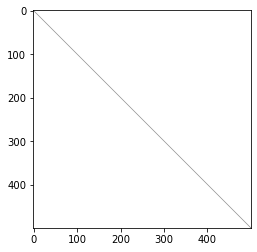

In [164]:
img = np.ones([W, H], dtype=np.uint8)
BresenhamLine(img, 0, 0, W-1, H-1)
showImg(img)

### All cases of Bresenham's Algorithm
However, as mentioned above this is only for octant zero, that is lines starting at the origin with a gradient between 0 and 1 where x increases by exactly 1 per iteration and y increases by 0 or 1.

The algorithm can be extended to cover gradients between 0 and -1 by checking whether y needs to increase or decrease (i.e. dy < 0)

In [191]:
def drawLine(img, x0, y0, x1, y1):
    canvas = np.ones([img.shape[0], img.shape[1]], dtype=np.uint8)
    
    flip_x_flag = False
    flip_y_flag = False
    flip_diag_flag = False

    dx = x1 - x0
    dy = y1 - y0

    if dx < 0:
        x0, x1 = x1, x0
        dx = x1 - x0
        flip_x_flag = True
    if dy < 0:
        y0, y1 = y1, y0
        dy = y1 - y0
        flip_y_flag = True
    if dx == 0 or dy/dx > 1:
        x0, y0, x1, y1 = y0, x0, y1, x1
        dx = x1 - x0
        dy = y1 - y0
        flip_diag_flag = True

    BresenhamLine(canvas, x0, y0, x1, y1)

    if flip_x_flag:
        canvas[:, x0:x1+1] = flip_x(canvas[:, x0:x1+1])

    if flip_y_flag:
        canvas[y0:y1+1, :] = flip_y(canvas[y0:y1+1, :])

    if flip_diag_flag:
        canvas = flip_diag(canvas)

    img[np.where(canvas == 0)] = 0
    return img

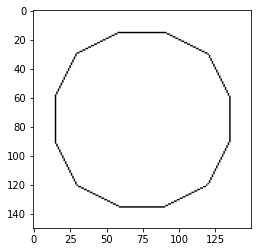

In [166]:
# All line segments are drawn in clockwise direction,
# here the omnidirectional line segment drawing is achieved

imgs = [np.ones([30, 30], dtype=np.uint8) for i in range(25)]
img_row_1 = np.hstack([imgs[0],
                       drawLine(imgs[1],  0, 29, 29, 15),
                       drawLine(imgs[2],  0, 15, 29, 15),
                       drawLine(imgs[3],  0, 15, 29, 29),
                       imgs[4]])
img_row_2 = np.hstack([drawLine(imgs[5],  15, 29, 29, 0),
                       imgs[6],
                       imgs[7],
                       imgs[8],
                       drawLine(imgs[9],  0, 0, 15, 29)])
img_row_3 = np.hstack([drawLine(imgs[10], 15, 29, 15, 0),
                       imgs[11],
                       imgs[12],
                       imgs[13],
                       drawLine(imgs[14],  15, 0, 15, 29)])
img_row_4 = np.hstack([drawLine(imgs[15],  29, 29, 15, 0),
                       imgs[16],
                       imgs[17],
                       imgs[18],
                       drawLine(imgs[19],  15, 0, 0, 29)])
img_row_5 = np.hstack([imgs[20],
                       drawLine(imgs[21],  29, 15, 0, 0, ),
                       drawLine(imgs[22],  29, 15, 0, 15, ),
                       drawLine(imgs[23],  29, 0, 0, 15),
                       imgs[24]])

img = np.vstack([img_row_1, img_row_2, img_row_3, img_row_4, img_row_5])
showImg(img)

### Line Width

In [167]:
# Wrap the drawline function to get list of points coordinates
def getLinePointsList(x0, y0, x1, y1):
    img = np.ones([W,H],dtype=np.uint8)
    img = drawLine(img, x0, y0, x1, y1)
    pointsList = np.where(img == 0)
    return pointsList


#### Naive Line Cap

In [168]:
def naive_drawLineWithWidth(img, x0, y0, x1, y1, width):
    dx = x1 - x0
    dy = y1 - y0
    
    if (dx == 0) or (abs(dy / dx) > 1):
        # Horizontal Brush
        x0_1 = round(x0 + width/2)
        x0_2 = round(x0 - width/2)
        y0_1 = y0
        y0_2 = y0
    else:
        # Vertical Brush
        x0_1 = x0
        x0_2 = x0
        y0_1 = round(y0 + width/2)
        y0_2 = round(y0 - width/2)
        
    yList, xList = getLinePointsList(x0_1, y0_1, x0_2, y0_2)
    
    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x+dx, y+dy)
        
    return img

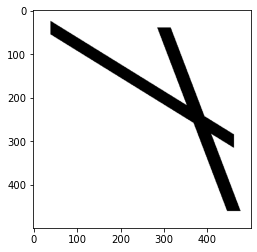

In [169]:
img = np.ones([W,H],dtype=np.uint8)
naive_drawLineWithWidth(img, 40, 40, 460, 300, 30)
naive_drawLineWithWidth(img, 460, 460, 300, 40, 30)
showImg(img)

#### Butt Cap

In [170]:
def butt_drawLineWithWidth(img, x0, y0, x1, y1, width):
    dx = x1 - x0
    dy = y1 - y0
    
    if (dx == 0):
        x0_1 = round(x0 + width/2)
        x0_2 = round(x0 - width/2)
        y0_1 = y0
        y0_2 = y0
    else:
        k_line = dy/dx
        if k_line == 0:
            cap_dx = 0
            cap_dy = width
        else:
            k_cap = -1/k_line
            cap_dx = width*1/math.sqrt(k_cap**2+1)
            cap_dy = width*k_cap/math.sqrt(k_cap**2+1)
        x0_1 = round(x0 + cap_dx/2)
        x0_2 = round(x0 - cap_dx/2)
        y0_1 = round(y0 + cap_dy/2)
        y0_2 = round(y0 - cap_dy/2)
        
    yList, xList = getLinePointsList(x0_1, y0_1, x0_2, y0_2)
    
    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x+dx, y+dy)
        
    return img

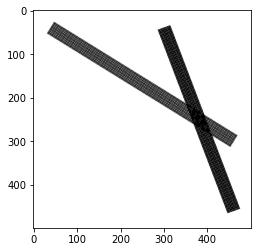

In [171]:
img = np.ones([W,H],dtype=np.uint8)
butt_drawLineWithWidth(img, 40, 40, 460, 300, 30)
butt_drawLineWithWidth(img, 460, 460, 300, 40, 30)
showImg(img)

#### Projecting Cap

In [172]:
def projecting_drawLineWithWidth(img, x0, y0, x1, y1, width):
    dx = x1 - x0
    dy = y1 - y0

    if (dx == 0):
        if y1 > y0:
            cap_dy = width
        else:
            cap_dy = -width
        dy += cap_dy
        x0_1 = round(x0 + width/2)
        x0_2 = round(x0 - width/2)
        y0_1 = round(y0 - cap_dy/2)
        y0_2 = round(y0 - cap_dy/2)
    else:
        k_line = dy/dx
        if dx > 0:
            cap_dx = 1
        else:
            cap_dx = -1
        if dy> 0:
            cap_dy = 1
        else:
            cap_dy = -1

        proj_dx = cap_dx*width*1/math.sqrt(k_line**2+1)
        proj_dy = cap_dy*width*abs(k_line)/math.sqrt(k_line**2+1)
        x0 = round(x0 - proj_dx/2)
        x1 = round(x1 + proj_dx/2)
        y0 = round(y0 - proj_dy/2)
        y1 = round(y1 + proj_dy/2)
        dx = x1 - x0
        dy = y1 - y0

        if k_line == 0:
            cap_dx = 0
            cap_dy = width
        else:
            k_cap = -1/k_line
            cap_dx = width*1/math.sqrt(k_cap**2+1)
            cap_dy = width*k_cap/math.sqrt(k_cap**2+1)
        x0_1 = round(x0 + cap_dx/2)
        x0_2 = round(x0 - cap_dx/2)
        y0_1 = round(y0 + cap_dy/2)
        y0_2 = round(y0 - cap_dy/2)

    yList, xList = getLinePointsList(x0_1, y0_1, x0_2, y0_2)

    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x+dx, y+dy)

    return img

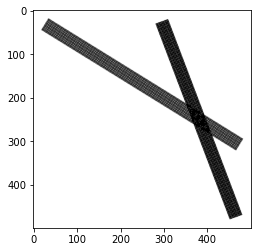

In [173]:
img = np.ones([W, H], dtype=np.uint8)
projecting_drawLineWithWidth(img, 40, 40, 460, 300, 30)
projecting_drawLineWithWidth(img, 460, 460, 300, 40, 30)
showImg(img)

#### Square Cap

In [174]:
def square_drawLineWithWidth(img, x0, y0, x1, y1, width):
    dx = x1 - x0
    dy = y1 - y0
    if (dx == 0):
        if y1 > y0:
            cap_dy = width
        else:
            cap_dy = -width
        dy += cap_dy
        x0_1 = round(x0 + width/2)
        x0_2 = round(x0 - width/2)
        y0_1 = y0
        y0_2 = y0
        x1_1 = round(x1 + width/2)
        x1_2 = round(x1 - width/2)
        y1_1 = y1
        y1_2 = y1
        y0 = round(y0 - cap_dy/2)
        y1 = round(y1 + cap_dy/2)
        dx = x1 - x0
        dy = y1 - y0
    else:
        k_line = dy/dx
        if k_line == 0:
            cap_dx = 0
            cap_dy = width
        else:
            k_cap = -1/k_line
            cap_dx = width*1/math.sqrt(k_cap**2+1)
            cap_dy = width*k_cap/math.sqrt(k_cap**2+1)
        x0_1 = round(x0 + cap_dx/2)
        x0_2 = round(x0 - cap_dx/2)
        y0_1 = round(y0 + cap_dy/2)
        y0_2 = round(y0 - cap_dy/2)
        x1_1 = round(x1 + cap_dx/2)
        x1_2 = round(x1 - cap_dx/2)
        y1_1 = round(y1 + cap_dy/2)
        y1_2 = round(y1 - cap_dy/2)

        if dx > 0:
            cap_dx = 1
        else:
            cap_dx = -1
        if dy > 0:
            cap_dy = 1
        else:
            cap_dy = -1
        proj_dx = cap_dx*width*1/math.sqrt(k_line**2+1)
        proj_dy = cap_dy*width*abs(k_line)/math.sqrt(k_line**2+1)

        x0 = round(x0 - proj_dx/2)
        x1 = round(x1 + proj_dx/2)
        y0 = round(y0 - proj_dy/2)
        y1 = round(y1 + proj_dy/2)
        dx = x1 - x0
        dy = y1 - y0

    yList, xList = getLinePointsList(x0, y0, x0_1, y0_1)
    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x+round(dx/2), y+round(dy/2))
    yList, xList = getLinePointsList(x0, y0, x0_2, y0_2)
    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x+round(dx/2), y+round(dy/2))
    yList, xList = getLinePointsList(x1, y1, x1_1, y1_1)
    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x-round(dx/2), y-round(dy/2))
    yList, xList = getLinePointsList(x1, y1, x1_2, y1_2)
    for (x, y) in zip(xList, yList):
        img = drawLine(img, x, y, x-round(dx/2), y-round(dy/2))

    return img

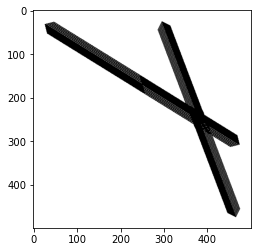

In [175]:
img = np.ones([W, H], dtype=np.uint8)
square_drawLineWithWidth(img, 40, 40, 460, 300, 30)
square_drawLineWithWidth(img, 460, 460, 300, 40, 30)
showImg(img)

## Experiments

### line cap styles

#### Utils

In [176]:
def CapStyleTest(argfunc):
    img = np.ones([W, H], dtype=np.uint8)
    # Oblique
    argfunc(img, 40, 40, 460, 300, 30)
    # Vertical
    argfunc(img, 170, 460, 170, 50, 30)
    # Horizontal
    argfunc(img, 40, 400, 460, 400, 30)
    # Oblique
    argfunc(img, 280, 460, 380, 150, 30)
    return img

#### Square Cap Lines

Wall time: 605 ms


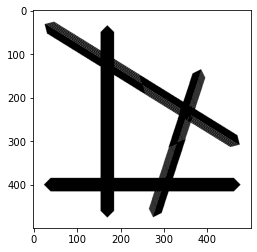

In [177]:
%%time
img = CapStyleTest(square_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_1_1_Square Cap Lines.png'))

#### Projecting Cap Lines

Wall time: 344 ms


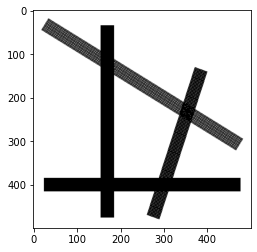

In [178]:
%%time
img = CapStyleTest(projecting_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_1_2_Projecting Cap Lines.png'))

#### Naive Cap Lines

Wall time: 356 ms


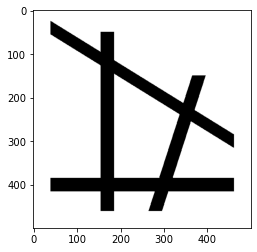

In [179]:
%%time
img = CapStyleTest(naive_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_1_3_NaiveCap Lines.png'))

#### Butt Cap Lines

Wall time: 336 ms


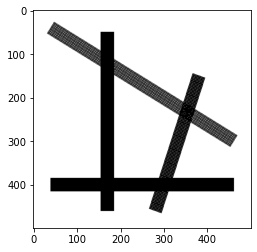

In [180]:
%%time
img = CapStyleTest(butt_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_1_4_Butt Cap Lines.png'))

### line cap styles with all directions

#### Utils

In [181]:
def AllDirectionTest(argfunc):
    # All line segments are drawn in clockwise direction,
    # here the omnidirectional line segment drawing is achieved

    imgs = [np.ones([W, H], dtype=np.uint8) for i in range(25)]
    width = 40
    zero = round(width/2+width/4)
    full_w = W-1 - zero
    half_w = round((W-1)/2)
    full_h = H-1 - zero
    half_h = round((H-1)/2)

    img_row_1 = np.hstack([imgs[0],
                           argfunc(imgs[1],  zero, full_h, full_w, half_h, width),
                           argfunc(imgs[2],  zero, half_h, full_w, half_h, width),
                           argfunc(imgs[3],  zero, half_h, full_w, full_h, width),
                           imgs[4]])
    img_row_2 = np.hstack([argfunc(imgs[5],  half_w, full_h, full_w, zero, width),
                           imgs[6],
                           imgs[7],
                           imgs[8],
                           argfunc(imgs[9],  zero, zero, half_w, full_h, width)])
    img_row_3 = np.hstack([argfunc(imgs[10], half_w, full_h, half_w, zero, width),
                           imgs[11],
                           imgs[12],
                           imgs[13],
                           argfunc(imgs[14],  half_w, zero, half_w, full_h, width)])
    img_row_4 = np.hstack([argfunc(imgs[15],  full_w, full_h, half_w, zero, width),
                           imgs[16],
                           imgs[17],
                           imgs[18],
                           argfunc(imgs[19],  half_w, zero, zero, full_h, width)])
    img_row_5 = np.hstack([imgs[20],
                           argfunc(imgs[21],  full_w, half_h, zero, zero, width),
                           argfunc(imgs[22],  full_w, half_h, zero, half_h, width),
                           argfunc(imgs[23],  full_w, zero, zero, half_h, width),
                           imgs[24]])

    img = np.vstack([img_row_1, img_row_2, img_row_3, img_row_4, img_row_5])
    
    return img

#### Square Cap with all directions

Wall time: 2.56 s


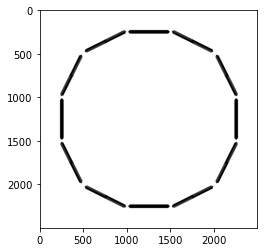

In [182]:
%%time
img = AllDirectionTest(square_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_2_1_Square Cap with all directions.png'))

#### Projecting Cap with all directions

Wall time: 1.58 s


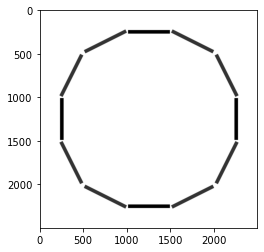

In [183]:
%%time
img = AllDirectionTest(projecting_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_2_2_Projecting Cap with all directions.png'))

#### Naive Cap with all directions

Wall time: 1.64 s


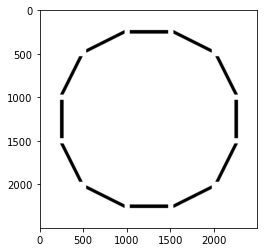

In [184]:
%%time
img = AllDirectionTest(naive_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_2_3_Naive Cap with all directions.png'))

#### Butt Cap with all directions

Wall time: 1.57 s


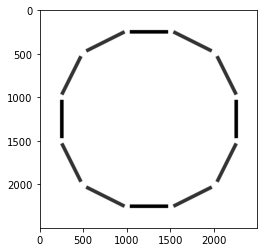

In [185]:
%%time
img = AllDirectionTest(butt_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_2_4_Butt Cap with all directions.png'))

### Line Joints

#### Utils

In [186]:
def LineJointsTest(argfunc):
    img = np.ones([W, H], dtype=np.uint8)
    argfunc(img, 40, 40, 460, 300, 30)
    argfunc(img, 40, 400, 460, 300, 30)
    argfunc(img, 40, 400, 390, 40, 30)
    return img

#### Square Cap Line Joints

Wall time: 502 ms


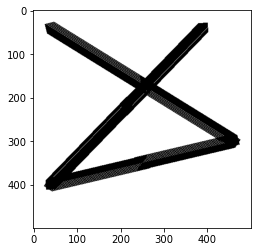

In [187]:
%%time
img = LineJointsTest(square_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_3_1_Square Cap Line Joints.png'))

#### Projecting Cap Line Joints

Wall time: 288 ms


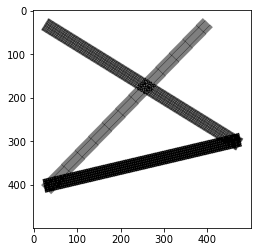

In [188]:
%%time
img = LineJointsTest(projecting_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_3_2_Projecting Cap Line Joints.png'))

#### Naive Cap Line Joints

Wall time: 310 ms


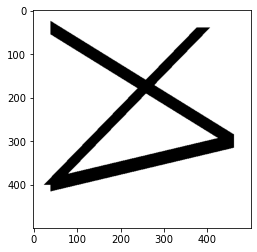

In [189]:
%%time
img = LineJointsTest(naive_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_3_3_Naive Cap Line Joints.png'))

#### Butt Cap Line Joints

Wall time: 359 ms


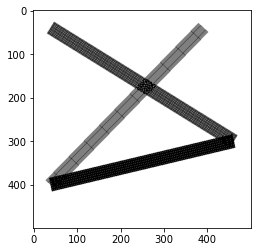

In [160]:
%%time
img = LineJointsTest(butt_drawLineWithWidth)
# showImg(img)
saveImg(img, os.path.join('output', 'exp_3_4_Butt Cap Line Joints.png'))

## Conclusion

### Pros  
- 8-directional line drawing using Bresenham's line algorithm
- All operations in the drawing use the whole class
- A variety of cap partitions were compared, where the ranking from most to least efficient is Butt > Projecting > Naive > Square. (The data here was obtained from the second experiment, where one of the main reasons for Square's low efficiency is that the computation has a large overhead.)


### Cons  
Except for Square cap and Naive, the remaining two plotting methods have voids in the line when the slope is close to 1


#### Projecting Cap

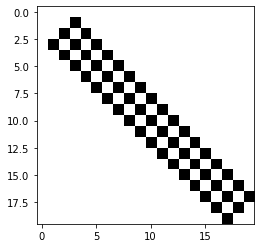

In [198]:
img = np.ones([20, 20], dtype=np.uint8)
projecting_drawLineWithWidth(img, 3, 3, 17, 17, 2)
showImg(img)

#### Butt Cap

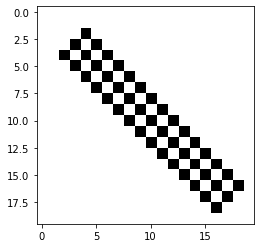

In [199]:
img = np.ones([20, 20], dtype=np.uint8)
butt_drawLineWithWidth(img, 3, 3, 17, 17, 2)
showImg(img)

#### Naive Cap

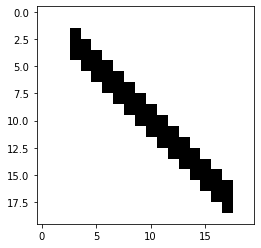

In [197]:
img = np.ones([20, 20], dtype=np.uint8)
naive_drawLineWithWidth(img, 3, 3, 17, 17, 2)
showImg(img)

#### Square Cap

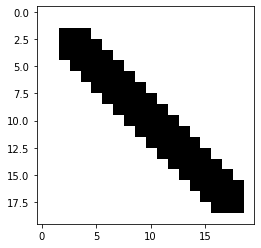

In [200]:
img = np.ones([20, 20], dtype=np.uint8)
square_drawLineWithWidth(img, 3, 3, 17, 17, 2)
showImg(img)